<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/carseats.png?raw=true" width=800 align="left"/>

# 실습 내용

- Carseats 데이터에 대해 모델링합니다.
- 다중 선형회귀 모델을 만들고 평가합니다.
- 특히 회귀 계수를 명확히 이해합니다.
- 예측 결과를 시각화합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Carseats.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 상위 몇 개 행 확인
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


**데이터 설명**

- Sales: 각 지역 판매량(단위: 1,000개)
- CompPrice: 경쟁사 가격 (단위: 달러)
- Income: 지역 평균 소득 (단위: 1,000달러)
- Advertising: 각 지역, 회사의 광고 예산 (단위: 1,000달러)
- Population: 지역 인구 수 (단위: 1,000명)
- Price: 자사 지역별 판매 가격 (단위: 달러)
- ShelveLoc: 진열 상태
- Age: 지역 인구의 평균 연령
- Education: 각 지역 교육 수준
- Urban: 도심 지역 여부 (Yes,No)
- US: 매장이 미국에 있는지 여부 (Yes, No)

In [4]:
# 기술통계 확인
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
# NaN 값 확인
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
# 상관관계 확인
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [11]:
data['Education'].value_counts()

17    49
12    49
10    48
11    48
16    47
13    43
14    40
18    40
15    36
Name: Education, dtype: int64

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [12]:
# target 확인
target = 'Sales'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

**2) 가변수화**

In [13]:
# 가변수화 대상: ShelveLoc, Education, Urban, US
dumm_cols = ['ShelveLoc', 'Education', 'Urban', 'US']

# 가변수화
x = pd.get_dummies(x, columns=dumm_cols, drop_first=True)

# 확인
x.head()

,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Good,ShelveLoc_Medium,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18,Urban_Yes,US_Yes
0,138,73,11,276,120,42,0,0,0,0,0,0,0,0,1,0,1,1
1,111,48,16,260,83,65,1,0,0,0,0,0,0,0,0,0,1,1
2,113,35,10,269,80,59,0,1,0,1,0,0,0,0,0,0,1,1
3,117,100,4,466,97,55,0,1,0,0,0,1,0,0,0,0,1,1
4,141,64,3,340,128,38,0,0,0,0,1,0,0,0,0,0,1,0


**3) 학습용, 평가용 데이터 분리**

In [14]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.

In [15]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [16]:
# 2단계: 선언하기
model = LinearRegression()

In [17]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LinearRegression()

In [18]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [19]:
# 5단계: 평가하기
print('MAE :', mean_absolute_error(y_test, y_pred))
print('R2 Score :', r2_score(y_test, y_pred))

MAE : 0.8416098802896127
R2 Score : 0.8657819916636766


In [51]:
# 학습성능, 평가성능 비교
print('학습성능 :', model.score(x_train, y_train))
print('평가성능 :', model.score(x_test, y_test))

학습성능 : 0.8752503437698539
평가성능 : 0.8657819916636766


In [52]:
# 회귀계수 확인
print(list(x))
print(model.coef_)
print(model.intercept_)

['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Education_11', 'Education_12', 'Education_13', 'Education_14', 'Education_15', 'Education_16', 'Education_17', 'Education_18', 'Urban_Yes', 'US_Yes']
[ 9.42233545e-02  1.38354290e-02  1.29531548e-01 -5.23624544e-04
 -9.67176394e-02 -5.14878643e-02  4.85610255e+00  2.02857909e+00
 -2.75940270e-01 -2.24414376e-01 -2.15006864e-01 -1.29912858e-01
  1.22594171e-01 -3.67638446e-01 -3.34511218e-01 -3.84411744e-01
  1.78293080e-01 -2.41139115e-01]
6.097879899078492


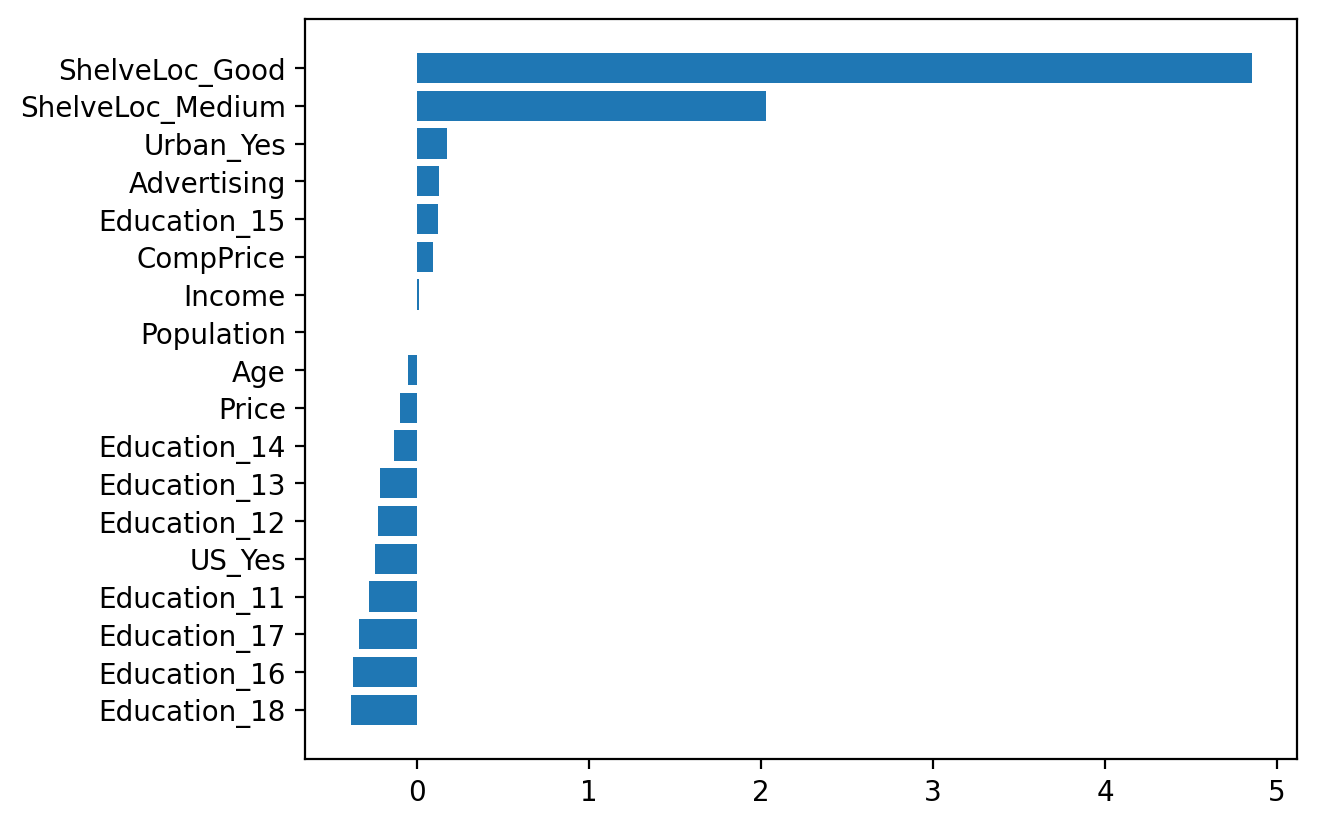

In [58]:
# 회귀계수 시각화
tmp = pd.DataFrame()
tmp['feature'] = list(x)
tmp['weight'] = model.coef_
tmp.sort_values(by='weight', ascending=True, inplace=True)

plt.barh(tmp['feature'], tmp['weight'])
plt.show()

# 5.기타

- 기타 필요한 내용이 있으면 진행합니다.

In [38]:
model.feature_names_in_

array(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'ShelveLoc_Good', 'ShelveLoc_Medium', 'Education_11',
       'Education_12', 'Education_13', 'Education_14', 'Education_15',
       'Education_16', 'Education_17', 'Education_18', 'Urban_Yes',
       'US_Yes'], dtype=object)

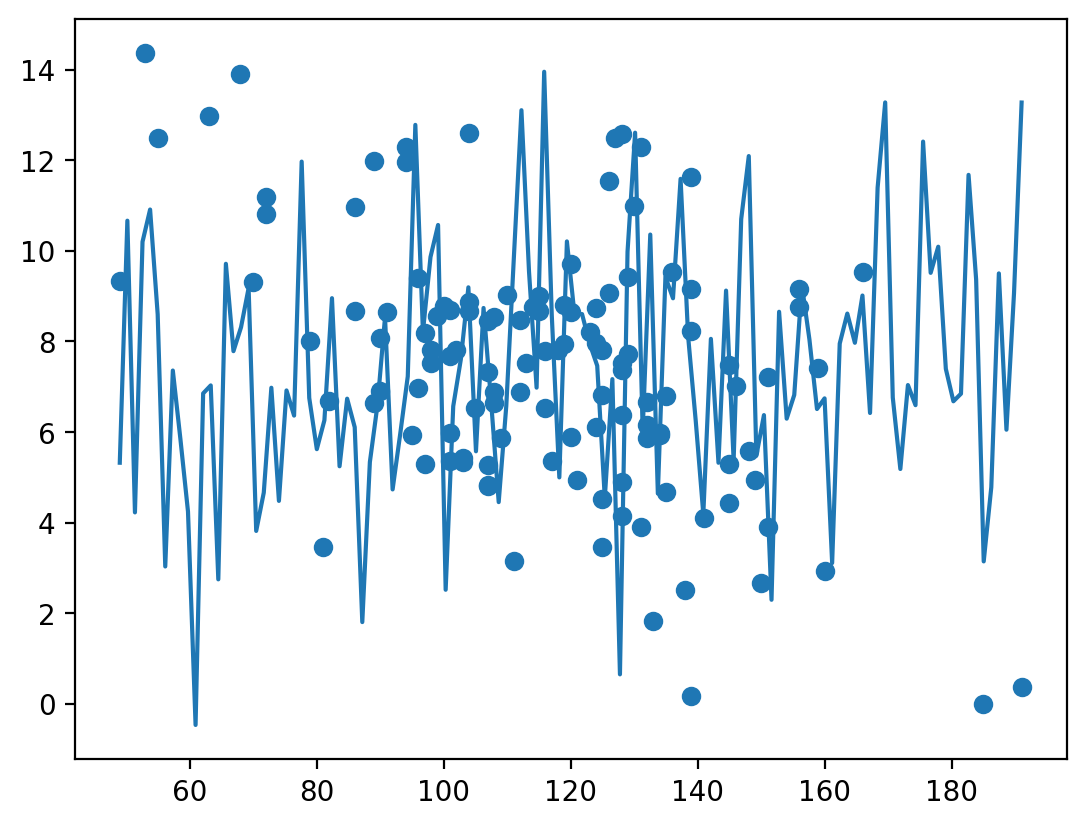

In [50]:
# 예측값, 실젯값 시각화
x_ = np.linspace(x_test['Price'].min(), x_test['Price'].max(), len(x_test['Price']))

plt.scatter(x_test['Price'], y_test)
plt.plot(x_, y_pred)
plt.show()